In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
trie_knn = pd.read_csv("../results/output_places_US_knn.csv")
ckqst = pd.read_csv("../results/output_places_US_ckqst.csv")


res = pd.concat([
    # knn_naive.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    # all_knn.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    trie_knn.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    # ckqst.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
])

name_map = {
    "places_knn": "Naive",
    "all_knn_NO": "Descend from all",
    "fast_NO": "Descend from trie",
    "ckqst_NO": "CkQST"
}
res['name'] = res['name'].apply(lambda x: name_map[x])

res

,creation_time,search_time,num_queries,name
0,219224542,4964572247,100000,Descend from trie
1,323376999,20506823219,500000,Descend from trie
2,812715342,44931054730,1000000,Descend from trie
3,2109129731,120910252713,2500000,Descend from trie
4,7050254524,300463557249,5000000,Descend from trie
5,220444317,5120089905,100000,Descend from all
6,425029681,21500572281,500000,Descend from all
7,780212305,43546307992,1000000,Descend from all
8,2726057029,121689631659,2500000,Descend from all
9,234008569,4456072531,100000,Descend from trie


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='No. of queries', ylabel='Index creation time (sec)'>

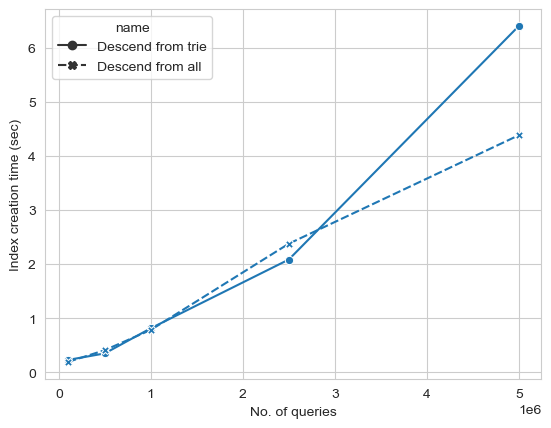

In [10]:
search_res = res.loc[:, ['creation_time', 'num_queries', 'name']]
search_res = search_res[search_res['num_queries'] > 10000]
search_res['Index creation time (sec)'] = search_res['creation_time'].apply(lambda x: x) / 1000000000
search_res = search_res.rename(columns={"num_queries": "No. of queries"})

sns.lineplot(x="No. of queries", y='Index creation time (sec)', style='name', data=search_res, errorbar=None, markers=True)

In [11]:
test = pd.DataFrame(res[res['num_queries'] == 500000])
test['search_time'] = test['search_time'].apply(lambda x: x / 500000)
test

,creation_time,search_time,num_queries,name
1,323376999,41013.646438,500000,Descend from trie
6,425029681,43001.144562,500000,Descend from all
10,371894073,38521.645258,500000,Descend from trie
14,390325725,45296.377116,500000,Descend from all


In [12]:
res[res['num_queries'] == 2500000]

,creation_time,search_time,num_queries,name
3,2109129731,120910252713,2500000,Descend from trie
8,2726057029,121689631659,2500000,Descend from all
11,2059931788,132622284468,2500000,Descend from trie
16,2029383729,136518490330,2500000,Descend from all


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='No. of queries', ylabel='Query Matching Time (nano sec)'>

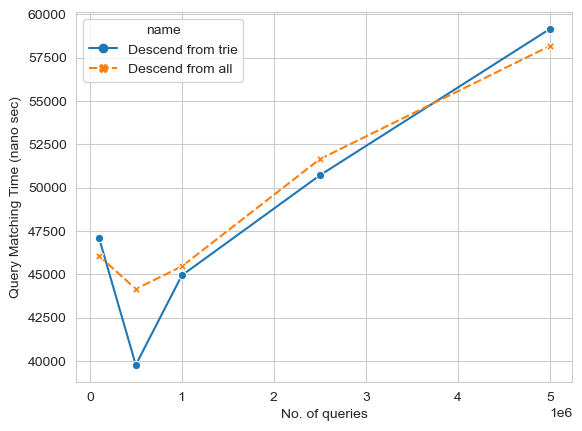

In [13]:
search_res = res.loc[:, ['search_time', 'num_queries', 'name']]
search_res['Query Matching Time (nano sec)'] = search_res['search_time'].apply(lambda x: x) / search_res['num_queries']
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

sns.lineplot(x="No. of queries", y='Query Matching Time (nano sec)', hue='name', style='name', data=search_res, errorbar=None, markers=True)

In [14]:
# Optimization
# - Custom iterator
# - Circle bound calculation